# Nine, simplified fifteen

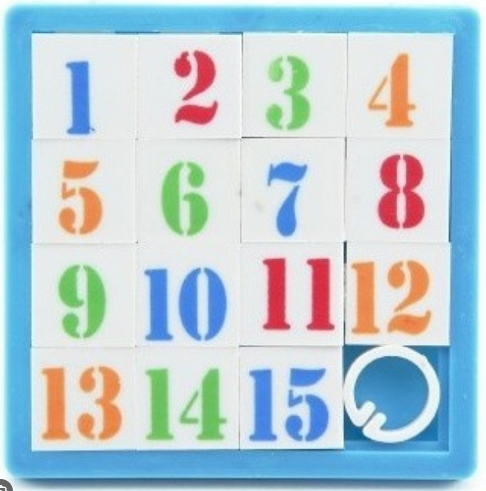

Initial and final state

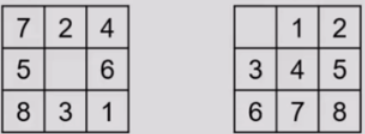

# Task 
- You have solved the State class from the previous problem, complete the methods.

- Now the State class also contains the heuristic, heuristic_1 and heuristic_2 methods. The heuristic methods for this task were introduced in the lecture.
- The heuristic_1 method is implemented.
- You must implement the heuristic_2 method.


- Observe the behavior, run time, number of scan states, and solution length of the problem with different algorithms with different heuristics.
    - Greedy heuristic 1
    - A* heuristic 1
    - Greedy heuristic 2
    - A* heuristic 2

You need to complete the code in the places marked with **# !!! todo**

In [1]:
import copy

In [ ]:
class State:


    generated = 0
    
    def __init__(self, gameplan, row, column):
        assert (gameplan[row][column] == 0)
        self.gameplan = gameplan
        self.row = row
        self.column = column
        State.generated += 1
        
    def expand(self, action):
        if action == 'l':
            if self.column > 0:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column - 1]
                new_gameplan[self.row][self.column - 1] = 0
                return State(new_gameplan, self.row, self.column - 1)
        if action == 'r':
            if self.column < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row][self.column + 1]
                new_gameplan[self.row][self.column + 1] = 0
                return State(new_gameplan, self.row, self.column + 1)
        if action == 'u':
            if self.row > 0:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row - 1][self.column]
                new_gameplan[self.row - 1][self.column] = 0
                return State(new_gameplan, self.row - 1, self.column)
        if action == 'd':
            if self.row < 2:
                new_gameplan = copy.deepcopy(self.gameplan)
                new_gameplan[self.row][self.column] = new_gameplan[self.row + 1][self.column]
                new_gameplan[self.row + 1][self.column] = 0
                return State(new_gameplan, self.row + 1, self.column)
        return None

    def __eq__(self, other):
        return self.gameplan == other.gameplan
        
    def heuristic(self, goal, version):
        if version==1: 
            return self.heuristic_1(goal)
        else:
            return self.heuristic_2(goal)
        
    def heuristic_1(self, goal):
        sum = 0
        for i in range(0,3):
            for j in range(0,3):                
                if (goal.gameplan[i][j] != self.gameplan[i][j]):
                    sum+=1
        return sum
    
    def heuristic_2(self, goal):
        sum = 0
        for i in range(0,3):
            for j in range(0,3):
                value = self.gameplan[i][j]
                if value != 0:
                    for goal_i in range(0,3):
                        for goal_j in range(0,3):
                            if goal.gameplan[goal_i][goal_j] == value:
                                sum += abs(i - goal_i) + abs(j - goal_j)
        return sum

Noda class has been expanded
* **Attributes**
    * **path_cost** - the actual cost to date to reach the node from the root
    * **heuristic** - value of the heuristic function, an estimate of the cost from the current node to the destination
    * **path_eval** - an estimate of the total cost from the root to the goal via this node (path_cost + heuristic)

* **Method**
    * **successors** has been modified to call the heuristic function

In [ ]:
class Node:
    """
        Node for searching
        
        parent - reference to the parent node
        state - object State
        action - the action that led to this node
        depth - tree depth
        path_cost - the actual cost to date to reach the top from the root
        heuristic - value of the heuristic function, an estimate of the cost from the current node to the destination
        path_eval - an estimate of the total cost from the root to the destination via this node (path_cost + heuristic)
        
    """

    def __init__(self, parent=None, state=None, action=None, depth=0, path_cost=0, path_eval=0, heuristic=0):
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth
        self.path_eval = path_eval
        self.path_cost = path_cost
        self.heuristic = heuristic

    def __eq__(self, other):        
        return self.state == other.state
    
    def succesors(self, actions, goal, heuristic_version):
        succesors = []
        for action in actions:
            new_state = self.state.expand(action)
            if new_state is not None:  
                heuristic = new_state.heuristic(goal, heuristic_version)
                succesors.append(Node(parent = self,
                                      state = new_state,
                                      action = action,
                                      depth = self.depth + 1,
                                      heuristic = heuristic,
                                      path_eval = self.depth + 1 + heuristic,
                                      path_cost = self.depth + 1
                                     )
                                )
        return succesors

    def path(self):
        actions = []
        node=self
        while node.action is not None:
            actions.append(node.action)
            node = node.parent
        actions.reverse()
        return actions

The **select_from**, **tree_search** and **graph_search** methods have been extended to call the greedy and A* algorithms.

In [ ]:
class Problem:
    """
        Main class
        
        fringe - a list of nodes to scan, initially populated with the initial state
        goal - goal state (we assume there is one)
        actions - list of possible actions        
    """

    def __init__(self, initial_state, goal, actions):
        global generated
        generated = 0
        self.goal = goal
        self.actions = actions                                
        
        self.fringe = []
        self.fringe.append(Node(parent = None, 
                                state = initial_state, 
                                action = None, 
                                depth = 0,
                                path_eval = 0,
                                path_cost = 0,
                                heuristic = 0))

    def goal_test(self, state):
        if self.goal == state:
            return True
        else:
            return False

    def select_from(self, fringe, strategy):
        if strategy=="BFS":
            return fringe.pop(0)
        elif strategy=="DFS":
            return fringe.pop(-1)                           
        elif strategy=="GBFS":
            min_index=0
            min_value=fringe[0].heuristic
            for i, node in enumerate (fringe):
                if min_value > node.heuristic:
                    min_index = i
                    min_value = node.heuristic
            return fringe.pop(min_index)                        
                           
        elif strategy=="A*":
            min_index = 0
            min_value = fringe[0].path_eval
            for i, node in enumerate (fringe):
                if min_value > node.path_eval:
                    min_index = i
                    min_value = node.path_eval
            return fringe.pop(min_index)                        
        
        else:
            return fringe.pop(0)
            

    def tree_search(self, strategy, heuristic_version=1):        
        while True:
            if len(self.fringe) == 0:
                return None

            node = self.select_from(self.fringe, strategy, heuristic_version)
            
            if node is None: 
                return None            
            
            if self.goal_test(node.state):
                return node
            
            self.fringe.extend(node.succesors(self.actions, self.goal, heuristic_version))

    def graph_search(self, strategy, heuristic_version=1, max_depth=5):
        
        explored = []
        while True:
            if len(self.fringe) == 0:
                return None
            
            node = self.select_from(self.fringe, strategy, heuristic_version)
            
            if node is None: 
                return None
            
            if self.goal_test(node.state):
                return node
            
            explored.append(node)
            
            succesors = node.succesors(self.actions, self.goal, heuristic_version)

            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# Greedy algorithm with heuristics 1

In [ ]:
problem = Problem(
                initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd']                
                )

State.generated = 0
solution = problem.graph_search(strategy='GBFS', heuristic_version=1)

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())    
else:
    print ("The problem has no solution.")

# A* with heuristic 1
You probably won't have the patience to finish.

In [ ]:
problem = Problem(
                initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],                
                )
State.generated = 0
solution = problem.graph_search(strategy='A*', heuristic_version=1)

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())    
else:
    print ("The problem has no solution.")

# Greedy algorithm with heuristics 2

In [ ]:
problem = Problem(
                initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd']                
                )

State.generated = 0
solution = problem.graph_search(strategy='GBFS', heuristic_version=2)

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())
else:
    print ("The problem has no solution.")

# A* algorithm with heuristic 2

In [ ]:
problem = Problem(
                initial_state=State([[7,2,4],[5,0,6],[8,3,1]], 1, 1),
                goal=State([[0,1,2],[3,4,5],[6,7,8]],0,0),
                actions=['l', 'r', 'u', 'd'],                
                )
State.generated = 0
solution = problem.graph_search(strategy='A*', heuristic_version=2)

if solution is not None:
    print (f"Number of states searched is {State.generated}.")
    print (solution.path())    
else:
    print ("The problem has no solution.")